In [1]:
%conda install -c conda-forge pandas numpy matplotlib seaborn scikit-learn

Solving environment...
Solving took 1.80110000000149 seconds
  Name                          Version                       Build                         Channel                       
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
+ brotli-python                 1.1.0                         h7223423_0                    https://repo.prefix.dev/emscripten-forge-dev/
+ certifi                       2025.10.5                     pyhd8ed1ab_0                  https://repo.prefix.dev/conda-forge/
+ charset-normalizer            3.4.3                         pyhd8ed1ab_0                  https://repo.prefix.dev/conda-forge/
~ comm                          0.2.2 -> 0.2.3                pyhd8ed1ab_1 -> pyhe01879c_0  https://repo.prefix.dev/conda-forge -> https://repo.prefix.dev/conda-forge/
~ contourpy                     1.3.2 -> 1.3.3                py313h3a67976_0 -> py313h3a67976_1https://repo.prefix.dev/emscripten-

In [2]:
## 데이터 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
df = pd.read_csv("p1.csv") 
df.head()

Matplotlib is building the font cache; this may take a moment.
/lib/python3.13/site-packages/seaborn/_statistics.py:32: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.3)
  from scipy.stats import gaussian_kde


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=B,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=B,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=B,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=B,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=B,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


### **1-1 결측치 처리 방안 2개 제시하고, 처리 전후 비교 및 더 나은 방안 선택하여 전처리 완료**

In [3]:
# info() 함수를 통해 데이터 타입, 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  608 non-null    object 
 1   Age       608 non-null    int64  
 2   Sex       608 non-null    object 
 3   ALB       607 non-null    float64
 4   ALP       590 non-null    float64
 5   ALT       607 non-null    float64
 6   AST       608 non-null    float64
 7   BIL       608 non-null    float64
 8   CHE       608 non-null    float64
 9   CHOL      598 non-null    float64
 10  CREA      608 non-null    float64
 11  GGT       608 non-null    float64
 12  PROT      607 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 57.1+ KB


-> ALB, ALP, ALT, CHOL, PROT에 결측치 있는 것 확인

In [4]:
# 컬럼별 결측치 개수 확인
df.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

**(결측치 처리 2가지 방안)**

1. **단순대치법, 대표값(평균)으로 대체**

   가장 간단하고 직관적인 방법입니다. 결측치가 있는 수치형 데이터를 해당 컬럼의 평균값으로 채우는 방식입니다.

   장점: 데이터가 많지 않을 때 전체 데이터의 통계적 특성(평균)을 크게 해치지 않으면서 결측치를 빠르게 채울 수 있다.

   단점: 하지만 데이터의 분산을 감소시킬 수 있고, 다른 변수와의 관계를 고려하지 않는다는 단점이 있다.
   
2. **K-최근접 이웃(KNN) 알고리즘으로 대체**

   결측치가 있는 데이터와 가장 유사한 특성을 가진 K개의 이웃 데이터를 찾고, 그 이웃들의 평균값으로 결측치를 채웁니다.

   장점: 이 방법은 변수 간의 상관관계를 고려하기 때문에 단순히 평균으로 채우는 것보다 데이터의 구조를 더 잘 보존하는 장점이 있다.

   단점: 거리 계산이 가능한 수치형 변수에만 적용 가능하다.

In [5]:
# 단순대치법을 적용해볼 데이터프레임 복사
df_mean = df.copy()

# 각 수치형 컬럼의 평균값으로 결측치 대체
for col in ['ALB', 'ALP', 'ALT', 'CHOL', 'PROT']:
    df_mean[col] = df_mean[col].fillna(df_mean[col].mean())

# 처리 후 결측치 확인
print("평균값 대체 후 결측치:")
print(df_mean.isnull().sum().sum()) # 0 출력

평균값 대체 후 결측치:
0


In [6]:
import pandas as pd
from sklearn.impute import KNNImputer

# 원-핫 인코딩을 적용해볼 데이터프레임 복사
df_knn = df.copy()

# 1. Sex 컬럼을 원-핫 인코딩으로 변환
# drop_first=True 옵션은 다중공선성을 방지하고 컬럼 수를 줄여줍니다 (Sex_m 하나만 생성됨).
df_knn = pd.get_dummies(df_knn, columns=['Sex'], drop_first=True)

# 2. KNN Imputer 객체 생성 (이웃 수 k=5)
imputer = KNNImputer(n_neighbors=5)

# 3. KNN을 이용해 결측치 대체
# 종속변수인 'Category'를 제외한 모든 수치형 컬럼을 선택합니다.
cols_for_impute = df_knn.drop(columns=['Category']).columns
df_knn[cols_for_impute] = imputer.fit_transform(df_knn[cols_for_impute])

# 4. 처리 후 결측치 확인
print("원-핫 인코딩 + KNN 대체 후 결측치 개수:")
# 최종적으로 결측치가 0개인지 확인
print(df_knn.isnull().sum().sum())

원-핫 인코딩 + KNN 대체 후 결측치 개수:
0


(범주형 데이터 인코딩 방식 비교)

**레이블 인코딩 (LabelEncoder)**

방식: 각 범주를 숫자로 매핑 (예: m=1, f=0).

문제점: 모델이 숫자 간에 순서나 크기가 있다고 오해할 수 있음 (1 > 0).

사용처: 트리 기반 모델(순서에 덜 민감)이나 데이터 자체에 순서가 있는 경우 ('대' > '중' > '소').

**원-핫 인코딩 (pd.get_dummies)**

방식: 각 범주를 별개의 0/1 컬럼으로 분리하여 순서 정보를 제거.

장점: 모델의 오해를 방지하여 선형 모델, 신경망 등 대부분의 경우에 더 안정적임.

사용처: 혈액형처럼 순서가 없는 일반적인 범주형 데이터. 가장 보편적으로 추천되는 방식.


**(KNN 선택)**

단순히 평균으로 채우는 것보다, 다른 혈액 수치들(Age, AST, BIL 등)과의 관계를 종합적으로 고려하여 결측치를 예측하는 KNN 방식이 데이터의 특성을 더 잘 보존할 수 있다. 

따라서 더 나은 분석 결과를 위해 KNN을 선택하여 최종 전처리를 완료하겠습니다.

In [7]:
import pandas as pd
from sklearn.impute import KNNImputer

# 1. 범주형 변수(Sex)를 원-핫 인코딩(더미 변수)으로 변환
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# 2. KNN Imputer 적용
imputer = KNNImputer(n_neighbors=5)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# 3. 최종 결측치 확인
print("## 최종 전처리 후 결측치 개수 ##")
print(df.isnull().sum().sum())

## 최종 전처리 후 결측치 개수 ##
0


### **1-2 이상치를 확인하고 처리 여부 판단 후 작업**

**boxplot을 그린다.**

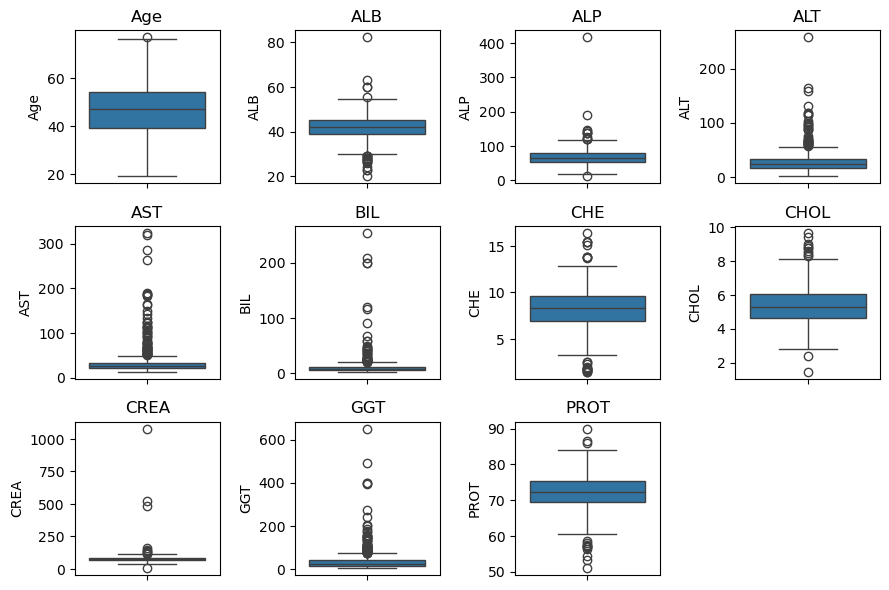

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 수치형 데이터만 선택 (종속변수 Category 제외)
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
# Sex_m 은 0/1 데이터이므로 시각화에서 제외
numeric_features = numeric_features.drop('Sex_m', errors='ignore') 

# --- 전체 그림판 설정 ---
# figsize=(9, 6): 전체 그림의 가로 9, 세로 6인치 크기로 설정
plt.figure(figsize=(9, 6))

# --- 모든 숫자 변수에 대해 반복해서 그래프 그리기 ---
for i, col in enumerate(numeric_features):
    
    # 그래프를 그릴 위치 선택 (3행 4열 격자의 i+1 번째 칸)
    plt.subplot(3, 4, i + 1)
    
    # 현재 변수(col)의 박스 플롯을 그림
    sns.boxplot(y=df[col])
    
    # 그래프 제목을 변수명으로 설정
    plt.title(col)

# --- 마무리 ---
# 그래프들이 겹치지 않게 자동으로 레이아웃 조정
plt.tight_layout()

# 완성된 그림을 화면에 출력
plt.show()

**핵심: 이상치는 제거하지 않는다!**

Box Plot을 통해 여러 변수에서 다수의 이상치(Outlier)가 발견되었다. 하지만 이 데이터는 간염 환자의 혈액 수치이므로, 극단적인 값들은 데이터 오류가 아니라 실제 중증 환자의 상태를 나타내는 중요한 정보일 가능성이 높다.

예를 들어, 간 기능이 심각하게 손상된 환자는 ALT 수치가 정상인보다 수십 배 높게 측정될 수 있다. 이러한 이상치를 임의로 제거하거나 대체하면, 모델이 질병의 심각도를 학습하는 데 필요한 핵심 정보를 잃게 된다.

따라서 이상치는 제거하지 않고, 대신 그 영향력을 완화하는 방향으로 처리한다.  




**해결책: 이상치에 강건한 RobustScaler 사용**

이상치를 그대로 유지하면서 모델 학습 시 발생할 수 있는 문제를 해결하기 위해 데이터 스케일링을 적용한다. 

특히 이상치가 많을 때는 평균과 표준편차를 사용하는 StandardScaler보다, 

**이상치의 영향을 거의 받지 않는 중앙값(Median)과 사분위수 범위(IQR)를 사용하는 RobustScaler가 훨씬 효과적이다.**

RobustScaler는 극단적인 값의 존재를 인정하면서도, 전체 데이터의 단위를 안정적으로 조정하여 모델의 성능을 향상시킨다.

In [9]:
from sklearn.preprocessing import RobustScaler

# 1. RobustScaler 객체 생성
scaler = RobustScaler()

# 2. 스케일링을 적용할 컬럼 목록 정의
# (종속변수 'Category'와 범주형에서 변환된 'Sex_m'은 제외)
cols_to_scale = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# 3. 선택한 컬럼들에 스케일러를 한 번에 적용
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# 4. 스케일링 결과 확인
print("Robust 스케일링 적용 후 데이터:")
df.head()

Robust 스케일링 적용 후 데이터:


,Category,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex_m
0,0=B,-1.0,-0.562249,-0.516288,-0.940092,-0.334821,0.033333,-0.508539,-1.417808,1.45,-0.474468,-0.533333,True
1,0=B,-1.0,-0.562249,0.157955,-0.307220,-0.102679,-0.566667,1.100569,-0.342466,-0.15,-0.325532,0.716667,True
2,0=B,-1.0,0.787149,0.324621,0.811060,2.388393,-0.200000,0.216319,-0.068493,0.45,0.423404,1.183333,True
3,0=B,-1.0,0.192771,-0.535227,0.466974,-0.290179,1.933333,-0.356736,-0.383562,0.15,0.448936,0.583333,True
4,0=B,-1.0,-0.449799,0.301894,0.589862,-0.093750,0.383333,0.333966,-0.671233,-0.05,0.282979,-0.583333,True


### **1-3. 탐색적 데이터 분석 (EDA) 및 변수별 차이 확인**

결측치와 이상치에 대한 전처리를 마친 데이터를 사용하여, 종속변수인 Category의 각 그룹(정상, 간염, 간경화)에 따라 다른 독립변수(혈액 수치)들이 통계적으로 유의미한 차이를 보이는지 확인하는 과정이다. 

이러한 차이가 뚜렷할수록 해당 변수는 종속변수를 예측하는 데 중요한 역할을 한다.

**(1). 수치적 분석**

먼저, 각 Category 그룹별로 독립변수들의 평균값이나 중앙값을 계산하여 수치적으로 차이가 있는지 확인한다.

In [10]:
# Category 그룹별로 주요 변수들의 평균값 계산
df.groupby('Category').mean()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex_m
Category,,,,,,,,,,,,
0=B,0.008755,0.038277,0.084663,0.223135,0.062425,0.204597,0.048610,0.136421,0.098874,0.246246,-0.014790,0.596623
1=H,-0.552778,0.294511,-0.794476,0.232360,4.453869,1.387500,0.384725,-0.137557,-0.152083,2.950177,0.416667,0.833333
2=F,0.355556,-0.038248,-0.576677,2.248848,4.939413,1.021429,0.024578,-0.472733,-0.175476,2.395846,0.650000,0.619048
3=C,0.431111,-1.494618,0.844874,-0.001843,7.286310,8.638889,-1.689437,-0.854292,3.061167,4.518723,-0.386111,0.666667


이 표는 RobustScaler로 스케일링된 데이터를 Category (질병 상태) 그룹별로 묶어 각 혈액 수치의 평균값을 계산한 것이다.

값이 0에 가까우면 전체 데이터의 중앙값과 유사하다는 뜻이고, 양수(+)나 음수(-)로 클수록 중앙값에서 많이 벗어났다는 의미이다.

**(핵심 관찰 및 해석)**

**1. 간 손상 지표의 급격한 증가**

AST, BIL(빌리루빈), GGT 수치는 정상(0=B) 그룹에 비해 모든 질병 그룹(1, 2, 3)에서 매우 큰 양수 값을 가진다.

해석: 이는 간염이나 간경화가 발생하면 이 수치들이 폭발적으로 증가한다는 것을 의미하며, 질병 상태를 예측하는 가장 강력한 신호들이다. 특히 간경화(3=C)에서 그 값이 가장 극단적이다.

**2. 간 기능 저하 지표의 감소**

ALB(알부민), CHE 수치는 질병이 심각해질수록(특히 간경화 3=C 그룹) 큰 음수 값을 보인다.

해석: 이는 간 기능이 저하되면 간에서 생성하는 단백질(알부민 등)의 양이 현저히 감소한다는 의학적 사실과 일치한다. 이 변수들 또한 중요한 예측 변수이다.

**3. 결론**

그룹 간 수치 차이가 매우 뚜렷하게 나타나므로, 이 독립변수들은 종속변수 Category를 예측하는 데 매우 유용하다.

모델을 만들었을 때, AST, BIL, GGT, ALB, CHE 등의 변수들이 중요 변수(Feature Importance)로 선정될 확률이 매우 높다.


**(2). 시각적 분석**

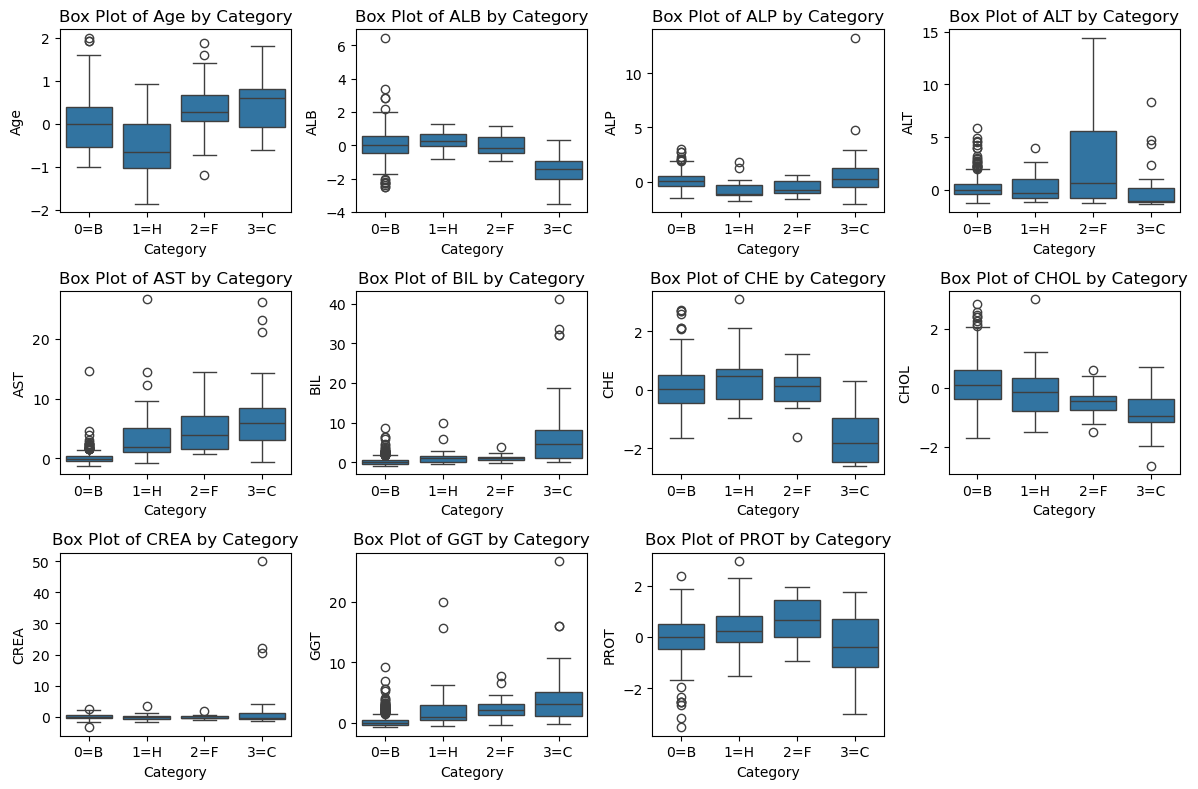

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 분석할 수치형 독립변수 목록
features_to_plot = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# 전체 그림판 설정
plt.figure(figsize=(12, 8))

# 각 변수에 대해 Category별 Box Plot 그리기
for i, col in enumerate(features_to_plot):
    # 3행 4열의 격자에 그래프 위치 지정
    plt.subplot(3, 4, i + 1)
    
    # Category를 x축, 현재 변수를 y축으로 하는 박스 플롯 생성
    sns.boxplot(x='Category', y=col, data=df)
    
    # 그래프 제목 설정
    plt.title(f'Box Plot of {col} by Category')

# 레이아웃 자동 조정 및 출력
plt.tight_layout()
plt.show()

**(결과 해석)**

실행된 차트들을 보면, 대부분의 혈액 수치에서 Category 그룹 간 분포 차이가 뚜렷하게 나타난다.

차이가 큰 변수: 특히 AST, ALT, GGT, BIL 등의 변수에서 정상(0=B) 그룹과 다른 그룹들 간의 차이가 명확하다. 예를 들어, 간경화(3=C) 그룹으로 갈수록 이 수치들의 중앙값과 전체적인 분포가 높아지는 경향을 보인다.

차이가 적은 변수: 반면 Age, CHOL 등은 그룹 간 차이가 상대적으로 미미해 보인다.

이러한 시각적 분석을 통해 어떤 변수가 간염 상태를 분류하는 모델을 만드는 데 더 중요한 기여를 할 것인지 직관적으로 파악할 수 있다.

### **1-4 주어진 데이터로부터 주성분분석을 수행해 새로운 설명변수를 도출할 수 있는지를 검토 ∙ 판단한 뒤, 그 결과를 제시하시오.**

**(1). PCA 적용 가능성 검토**

PCA가 효과적이려면, 먼저 기존 변수들 간에 상관관계가 높아야 한다. 
    
만약 모든 변수들이 서로 독립적이라면, 요약할 '공통된 정보'가 없으므로 PCA는 의미가 없다.

**-> 변수들 간의 상관관계를 히트맵(Heatmap)으로 시각화하여 PCA 적용이 적절한지 먼저 판단한다.**

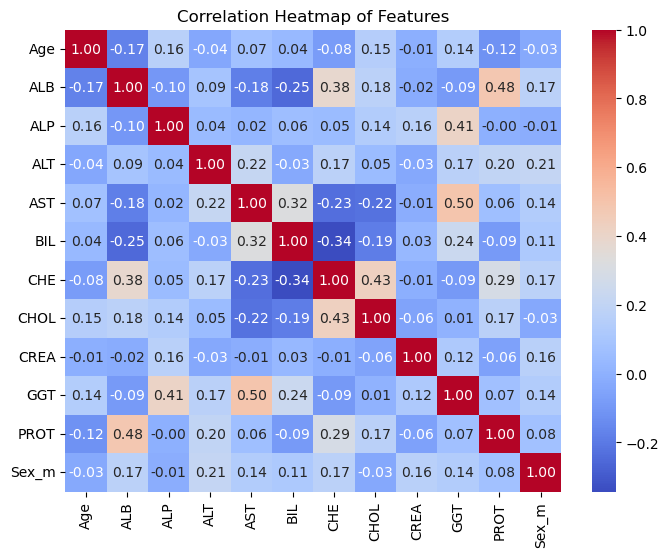

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 행렬 계산 (수치형 변수만 선택)
corr_matrix = df.drop(columns=['Category']).corr()

# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

In [13]:
# 'Category'를 제외한 모든 변수 간의 상관관계 행렬을 계산하고 출력합니다.
correlation_result = df.drop(columns=['Category']).corr()

print(correlation_result)

            Age       ALB       ALP       ALT       AST       BIL       CHE  \
Age    1.000000 -0.171243  0.160961 -0.041815  0.073111  0.035758 -0.080787   
ALB   -0.171243  1.000000 -0.096128  0.091849 -0.181215 -0.248968  0.381172   
ALP    0.160961 -0.096128  1.000000  0.042194  0.020876  0.059542  0.048083   
ALT   -0.041815  0.091849  0.042194  1.000000  0.215166 -0.031968  0.173125   
AST    0.073111 -0.181215  0.020876  0.215166  1.000000  0.322628 -0.234705   
BIL    0.035758 -0.248968  0.059542 -0.031968  0.322628  1.000000 -0.342546   
CHE   -0.080787  0.381172  0.048083  0.173125 -0.234705 -0.342546  1.000000   
CHOL   0.145398  0.175983  0.137355  0.050279 -0.224042 -0.190123  0.429159   
CREA  -0.012079 -0.020992  0.163891 -0.034841 -0.013165  0.031017 -0.012087   
GGT    0.141081 -0.088788  0.410561  0.169998  0.496529  0.238781 -0.091646   
PROT  -0.121471  0.480931 -0.004657  0.199467  0.064974 -0.086650  0.290449   
Sex_m -0.030400  0.172461 -0.013052  0.211072  0.135

**(히트맵 결과 해석)**

AST와 GGT의 상관계수가 약 0.50인 것을 제외하면, 절댓값이 0.5를 넘는 아주 강한 1:1 상관관계를 보이는 변수 쌍은 거의 없다. 

대부분의 변수들은 0.2 ~ 0.4 사이의 중간 정도의 상관관계를 보인다.

하지만 주성분 분석(PCA)은 단순히 두 변수 간의 관계만 보는 것이 아니라, 여러 변수들이 함께 만들어내는 전체적인 패턴과 정보의 중복성을 찾아낸다. 

즉, 개별 상관관계는 아주 높지 않더라도 여러 변수들 사이에 중간 정도의 관계가 거미줄처럼 복잡하게 얽혀 있다면, 이들의 정보를 종합적으로 요약하는 PCA는 여전히 의미 있는 분석이 될 수 있다.

따라서 변수들 간의 전반적인 관계 구조를 고려할 때, 주성분 분석(PCA)을 적용하여 정보 요약 가능성을 확인해 보는 것은 적절하다고 판단된다.

**(2). 주성분 분석 수행 및 결과 제시**

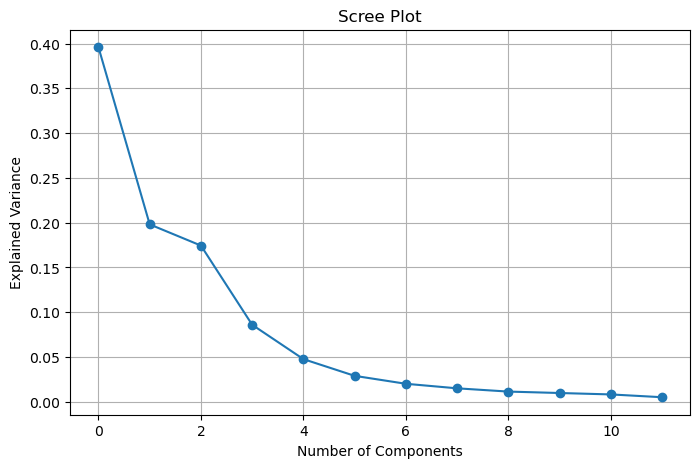

Variance explained by each component:
PC 1: 0.3960 (Cumulative: 0.3960)
PC 2: 0.1981 (Cumulative: 0.5940)
PC 3: 0.1744 (Cumulative: 0.7684)
PC 4: 0.0859 (Cumulative: 0.8544)
PC 5: 0.0476 (Cumulative: 0.9019)
PC 6: 0.0289 (Cumulative: 0.9308)
PC 7: 0.0200 (Cumulative: 0.9508)
PC 8: 0.0150 (Cumulative: 0.9658)
PC 9: 0.0113 (Cumulative: 0.9771)
PC 10: 0.0097 (Cumulative: 0.9868)
PC 11: 0.0081 (Cumulative: 0.9950)
PC 12: 0.0050 (Cumulative: 1.0000)


In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 독립변수(X)와 종속변수(y) 분리
X = df.drop('Category', axis=1)
y = df['Category']

# PCA 수행
pca = PCA()
X_pca = pca.fit_transform(X)

# Scree Plot 시각화 (가장 간단한 형태)
plt.figure(figsize=(8, 5)) # 그래프 크기 조절 (선택 사항)

# pca.explained_variance_ratio_를 이용해 바로 꺾은선 그래프 그리기
plt.plot(pca.explained_variance_ratio_, 'o-')

# 그래프 제목 및 축 레이블 설정
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

plt.grid() # 격자 추가 (선택 사항)
plt.show()

# 각 주성분의 설명력과 누적 설명력 출력
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Variance explained by each component:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    # PC 번호, 개별 설명력, 누적 설명력을 소수점 4자리까지 형식에 맞춰 출력
    print(f'PC {i+1}: {ratio:.4f} (Cumulative: {cumulative_variance[i]:.4f})')

**(주성분 개수 결정)**

앞선 Scree Plot과 누적 설명력 분석 결과를 바탕으로, 최적의 주성분 개수를 4개로 결정합니다.

**누적 설명력 기준**: 상위 4개의 주성분(PC1~PC4)만으로 원본 데이터 전체 분산의 85.4%를 설명할 수 있어, 정보 손실을 최소화하면서 차원을 효과적으로 축소할 수 있습니다.

**엘보우 포인트 (Elbow Point)**: Scree Plot에서 PC4 이후부터 각 주성분이 추가로 설명하는 정보량(기울기)이 크게 감소하므로, PC4가 가장 효율적인 절충점입니다.

**(주성분 분석 적용 및 새로운 변수 생성)**

In [15]:
from sklearn.decomposition import PCA
import pandas as pd

# 이전에 정의된 독립변수 데이터 X를 사용합니다.
# X = df.drop('Category', axis=1)

# 1. PCA 객체 생성 (주성분 개수를 4개로 지정)
pca = PCA(n_components=4)

# 2. PCA를 데이터에 적용(fit)하고 새로운 주성분으로 변환(transform)
X_pca = pca.fit_transform(X)

# 3. 결과를 보기 좋은 pandas DataFrame으로 변환
# 컬럼 이름을 PC1, PC2, PC3, PC4로 설정합니다.
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# 4. 새로 생성된 주성분 변수 데이터 확인
print("새롭게 생성된 주성분 변수 (상위 4개):")
df_pca.head()

새롭게 생성된 주성분 변수 (상위 4개):


,PC1,PC2,PC3,PC4
0,-1.374408,0.906656,1.204612,-1.140392
1,-1.831855,0.074323,-0.329271,-0.317844
2,0.193126,-1.685996,-0.042229,-0.925695
3,0.221135,1.536888,-0.036121,0.175871
4,-0.809504,0.440227,-0.149774,0.106096


### **2-1 데이터 불균형이 왜 문제인지 설명하고 불균형 해결방법에 대해 두가지를 설명하라.**

**(데이터 불균형 확인)**

## Category별 데이터 개수 ##
Category
0=B    533
3=C     30
1=H     24
2=F     21
Name: count, dtype: int64


## Category별 데이터 비율 ##
Category
0=B    87.66%
3=C     4.93%
1=H     3.95%
2=F     3.45%
Name: proportion, dtype: object


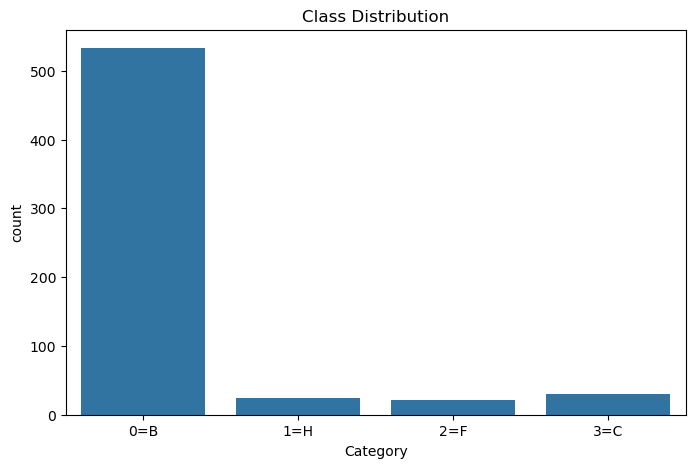

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 각 카테고리별 데이터 개수 확인 (수치)
print("## Category별 데이터 개수 ##")
print(df['Category'].value_counts())

print("\n" + "="*30 + "\n") # 구분선

# 2. 각 카테고리별 데이터 비율 확인 (백분율)
print("## Category별 데이터 비율 ##")
print(df['Category'].value_counts(normalize=True).map('{:.2%}'.format))


# 3. 데이터 불균형 시각화 (그래프) 📊
plt.figure(figsize=(8, 5))
sns.countplot(x='Category', data=df)
plt.title('Class Distribution')
plt.show()

**우리의 데이터에서 Category (종속변수)의 분포를 보면 정상(0=B) 데이터가 533개로 전체의 약 88%를 차지하고, 나머지 간염/간경화 데이터는 모두 합쳐 12%에 불과하다.**

이처럼 데이터가 한쪽 클래스에 심각하게 치우쳐 있는 상태를 데이터 불균형(Imbalanced Data)이라고 한다.

이 상태로 모델을 학습시키면 두 가지 큰 문제가 발생한다.

**모델의 편향 (Bias)**: 모델은 성능을 높이기 위해 다수를 차지하는 클래스(정상)의 특징만 집중적으로 학습하게 된다. 소수 클래스(간염/간경화)의 중요한 특징은 무시해 버린다.

**평가 지표의 함정 (Misleading Metrics)**: 위와 같이 편향된 모델이 모든 환자를 '정상'이라고만 예측해도, 이미 데이터의 88%가 정상이므로 **정확도(Accuracy)는 88%**라는 매우 높은 수치가 나온다.

**(데이터 불균형 해결방안)**

**방안 1: 오버샘플링 (Oversampling) - SMOTE 기법**

오버샘플링은 소수 클래스의 데이터 수를 늘려서 다수 클래스와의 비율을 맞추는 방법이다. 가장 대표적이고 효과적인 기법이 바로 SMOTE이다.

SMOTE는 단순히 소수 데이터를 복제하는 것이 아니라, 소수 데이터와 그 데이터와 가까운 이웃 소수 데이터들 사이의 공간에 새로운 가상의 데이터를 생성해 낸다.

장점: 데이터 손실 없이 소수 클래스의 정보를 보강하므로 모델의 성능 향상에 크게 기여합니다.

단점: 잘못하면 실제와 다른 노이즈를 생성할 수 있고, 데이터가 커져 학습 시간이 늘어날 수 있습니다.

**방안 2: 오버샘플링 (Oversampling) - Random Over Sampling (ROS) 기법**

오버샘플링은 소수 클래스의 데이터 수를 늘려서 다수 클래스와의 비율을 맞추는 방법이다. 가장 단순하고 직관적인 기법이 Random Over Sampling (ROS)이다.

ROS는 소수 클래스의 데이터 중에서 일부를 무작위로 단순 복제(Randomly Duplicating)하여 데이터 수를 늘리고, 다수 클래스와의 개수를 맞추는 가장 기본적인 방식이다.

장점: 구현이 매우 간단하고, SMOTE처럼 가상의 데이터를 만들지 않기 때문에 기존 데이터의 정보 왜곡이 없다.

단점: 똑같은 데이터를 여러 번 복제하는 것이므로, 모델이 특정 데이터에만 과도하게 학습하는 과적합(Overfitting)을 유발할 위험이 매우 크다.

**방안 3: 언더샘플링 (Undersampling) - Random Under Sampling (RUS) 기법**

언더샘플링은 오버샘플링과 반대로 다수 클래스의 데이터 수를 줄여서 소수 클래스의 수에 맞추는 방법이다. 가장 대표적이고 직관적인 기법이 Random Under Sampling (RUS)이다.

RUS는 다수 클래스의 데이터 중에서 일부를 무작위로 단순 제거(Randomly Removing)하여 소수 클래스와 데이터 개수를 강제로 맞추는 가장 간단한 방식입니다.

장점: 전체 데이터 크기가 줄어들어 모델의 학습 속도가 매우 빨라진다.

단점: 다수 클래스의 데이터에서 중요한 정보가 손실될 위험이 매우 크다. 이는 모델 성능 저하의 원인이 될 수 있어 신중하게 사용해야 한다.

### **2-2 불균형 데이터 분류모델에 적합한 평가지표 3개 제시하고 그 이유 설명하라.**

정확도(Accuracy)는 전체 데이터 중 맞춘 개수의 비율만 보기 때문에, 데이터가 불균형할 경우 다수 클래스만 잘 예측해도 높게 나와 모델의 성능을 심각하게 왜곡한다. 

따라서 소수 클래스(이 데이터에서는 '환자')를 얼마나 잘 탐지하는지에 초점을 맞춘 평가지표를 사용해야 한다.

**(1). 재현율 (Recall / Sensitivity)**

정의: 실제 'Positive'(환자)인 데이터 중에서 모델이 'Positive'(환자)라고 예측한 비율이다. 즉, 모델이 실제 환자를 놓치지 않고 얼마나 잘 찾아냈는지를 나타낸다. TP/(TP + FN)이다.

선정 이유: "반드시 찾아내야 할 소수 클래스를 놓치지 않는 능력"을 측정하기 때문이다. 의료 진단과 같이, 실제 환자를 정상이라고 잘못 판단하는 것이 매우 치명적인 문제에서는 재현율이 가장 중요한 평가지표가 된다. 모델이 모든 데이터를 '정상'이라고 예측하는 최악의 경우, 재현율은 0이 되어 모델의 문제점을 명확히 드러낸다.

**(2). 정밀도 (Precision)**

정의: 모델이 'Positive'(환자)라고 예측한 데이터 중에서 실제로 'Positive'(환자)였던 비율이다. 즉, 모델의 '환자'라는 예측이 얼마나 정확한지를 나타낸다. TP/(TP + FP)이다.

선정 이유: "Positive 예측의 신뢰도"를 측정하기 때문이다. 재현율만 높이기 위해 모델이 모든 데이터를 '환자'라고 예측하면, 재현율은 100%가 되지만 정밀도는 매우 낮아진다. 이처럼 정밀도는 모델이 불필요한 예측을 남발하지 않도록 제어하는 역할을 한다. 정상인에게 불필요한 추가 검사나 치료를 유발하는 비용을 줄여야 할 때 중요하다.

**(3). F1-Score**

정의: 정밀도(Precision)와 재현율(Recall)의 조화 평균이다. 식은 '2 x (정밀도 x 재현율) / (정밀도 + 재현율)' 이다.

선정 이유: 정밀도와 재현율의 균형을 종합적으로 평가하기 때문이다. 정밀도와 재현율은 한쪽이 높아지면 다른 쪽이 낮아지는 상충 관계에 있는 경우가 많다. F1-Score는 이 두 지표 중 어느 한쪽에 치우치지 않고 둘 다 높은 값을 가질 때 가장 높은 점수를 부여한다. 따라서 소수 클래스에 대한 예측 성능을 종합적이고 균형 있게 판단해야 할 때 가장 널리 사용되는 평가지표다.

### **2-3 종속 변수를 정상(Category 0)과 비정상(Category 1,2,3)로 변경한 후 위의 2가지 불균형 처리 방법을 사용하고, 3가지 평가지표로 결과를 각각 평가하라.**

언더샘플링은 다수 클래스의 데이터를 무작위로 제거하여 데이터 균형을 맞추는 방법이다. 이 데이터의 경우 전체 데이터가 608개로 많지 않은 편인데, 여기서 다수 클래스(정상, 533개)의 데이터를 소수 클래스(비정상, 75개)에 맞춰 대폭 삭제하면 데이터의 중요한 정보가 손실될 위험이 매우 크다. 

이러한 정보 손실은 모델의 전반적인 성능 저하로 이어질 수 있으므로, **정보 보존에 유리한 오버샘플링 기법(SMOTE, ROS)을 사용하여 불균형 문제를 해결한다.**

**(데이터 준비)**

먼저 종속변수를 정상(0)과 비정상(1)으로 이진화하고, 데이터프레임의 인덱스를 0부터 시작하도록 초기화한다. 

그 후, 문제의 규칙에 따라 인덱스 번호를 5로 나눈 나머지가 0이면 테스트 데이터, 그 외에는 학습 데이터로 분리한다.

In [17]:
# imbalanced-learn 라이브러리 설치 (먼저 실행하세요)
%conda install -c conda-forge imbalanced-learn

Solving environment...
Solving took 1.697699999999255 seconds
  Name                          Version                       Build                         Channel                       
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
+ imbalanced-learn              0.14.0                        pyhd8ed1ab_0                  https://repo.prefix.dev/conda-forge/
Installing imbalanced-learn-0.14.0-pyhd8ed1ab_0.conda


In [18]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE, RandomOverSampler

# 1. 원본 데이터를 복사하여 이번 문제 전용으로 사용
df_binary = df.copy()

# 2. 복사본의 종속변수를 이진화
if df_binary['Category'].dtype == 'object':
    df_binary['Category'] = df_binary['Category'].str[0].astype(int)
df_binary['Category'] = np.where(df_binary['Category'] == 0, 0, 1)

# 3. 인덱스 초기화 및 규칙에 따른 분할
df_binary = df_binary.reset_index(drop=True)
test_idx = df_binary.index[df_binary.index % 5 == 0]
train_idx = df_binary.index[df_binary.index % 5 != 0]

X_train = df_binary.loc[train_idx].drop('Category', axis=1)
y_train = df_binary.loc[train_idx]['Category']
X_test = df_binary.loc[test_idx].drop('Category', axis=1)
y_test = df_binary.loc[test_idx]['Category']

print(f"학습 데이터 크기: {len(X_train)}")
print(f"테스트 데이터 크기: {len(X_test)}")

학습 데이터 크기: 486
테스트 데이터 크기: 122


**3가지 모델과 2가지 샘플링 기법의 성능을 최종적으로 평가한다.**

In [19]:
# 1. 사용할 모델 정의
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# 2. 오버샘플링 기법 적용
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

resampled_data = {
    "SMOTE": (X_train_smote, y_train_smote),
    "ROS": (X_train_ros, y_train_ros)
}

# 3. 결과 저장을 위한 리스트 생성
results = []

# 4. 반복문을 통해 학습 및 평가 자동화
for sampling_name, (X_res, y_res) in resampled_data.items():
    for model_name, model in models.items():
        model.fit(X_res, y_res)
        y_pred = model.predict(X_test)

        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results.append({
            'Sampling': sampling_name,
            'Model': model_name,
            'Precision': f'{precision:.4f}',
            'Recall': f'{recall:.4f}',
            'F1-Score': f'{f1:.4f}'
        })

# 5. 최종 결과를 DataFrame으로 출력
results_df = pd.DataFrame(results)
print(results_df)

  Sampling                Model Precision  Recall F1-Score
0    SMOTE  Logistic Regression    0.7778  0.9333   0.8485
1    SMOTE        Random Forest    1.0000  1.0000   1.0000
2    SMOTE    Gradient Boosting    1.0000  1.0000   1.0000
3      ROS  Logistic Regression    0.7368  0.9333   0.8235
4      ROS        Random Forest    1.0000  1.0000   1.0000
5      ROS    Gradient Boosting    1.0000  1.0000   1.0000


**(결과 해석)**

가장 눈에 띄는 점은 Random Forest와 Gradient Boosting 모델이 SMOTE와 ROS 두 가지 오버샘플링 기법 모두에서 정밀도, 재현율, F1-Score 모두 1.0000이라는 완벽한 점수를 기록했다는 것이다. 이는 해당 모델들이 테스트 데이터의 모든 정상(0)과 비정상(1) 샘플을 단 하나의 오류도 없이 완벽하게 분류했음을 의미한다.

Logistic Regression 모델 또한 F1-Score가 0.8 이상으로 준수한 성능을 보였지만, 트리 기반 앙상블 모델들에는 미치지 못했다.

이는 전처리된 혈액 수치 데이터가 비정상 환자를 구분하는 데 매우 강력한 예측 변수로 작용하며, 데이터 불균형 문제를 해결했을 때 Random Forest나 Gradient Boosting과 같은 강력한 모델이 그 패턴을 완벽하게 학습할 수 있음을 보여준다.

**(최종 결론)**

데이터 불균형 문제를 해결하기 위해 SMOTE 또는 ROS 기법으로 오버샘플링을 적용하고, 모델로 Random Forest나 Gradient Boosting을 사용하는 것이 최적의 조합이다.

두 모델의 성능이 동일하게 완벽하므로 어느 것을 선택해도 무방하다. 일반적으로 Random Forest가 Gradient Boosting보다 학습 속도가 조금 더 빠른 경향이 있으므로, 실용적인 측면에서 Random Forest를 최종 모델로 선정할 수 있다.

결론적으로, 적절한 데이터 전처리 및 불균형 해소 과정을 거친 후 강력한 분류 모델을 사용함으로써 비정상 환자를 완벽하게 예측하는 모델을 구축할 수 있었다.


## 최적 모델의 변수 중요도 분석 ##

## 변수 중요도 (수치) ##
AST      0.322701
GGT      0.183062
BIL      0.120185
ALT      0.094925
CHOL     0.069533
ALP      0.060972
CREA     0.033773
PROT     0.032229
ALB      0.031581
CHE      0.029157
Age      0.020108
Sex_m    0.001773
dtype: float64


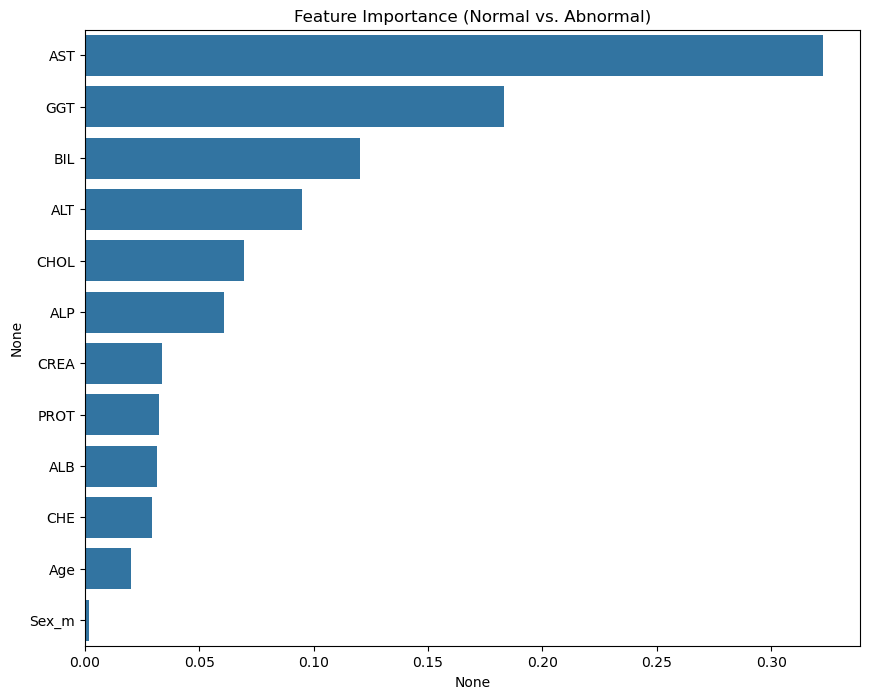

In [20]:
# --- 이 코드를 2-3번 문제의 마지막에 추가 ---

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 변수 중요도 시각화 및 '수치 출력' 함수 정의
def plot_feature_importances(model, columns, title):
    importances = pd.Series(model.feature_importances_, index=columns)
    importances = importances.sort_values(ascending=False)

    # --- 추가된 부분 ---
    # 계산된 변수 중요도를 수치로 출력한다.
    print("\n## 변수 중요도 (수치) ##")
    print(importances)
    # ------------------

    plt.figure(figsize=(10, 8))
    sns.barplot(x=importances, y=importances.index)
    plt.title(title)
    plt.show()

# 2. 가장 성능이 좋았던 모델(ROS + Random Forest)을 다시 학습
print("\n## 최적 모델의 변수 중요도 분석 ##")
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train_ros, y_train_ros) # X_train_ros, y_train_ros는 2-3에서 생성됨

# 3. 학습된 모델의 변수 중요도 시각화 및 수치 출력
plot_feature_importances(
    best_model,
    X_train.columns, # 변수(컬럼) 이름은 원본 X_train의 것을 사용
    'Feature Importance (Normal vs. Abnormal)'
)

### **3-1 1에서 전처리 완료한 데이터를 바탕으로 종속변수에서 0을 제외한 1,2,3의 데이터만 필터하여 분류모델 학습 및 평가를 진행하라.**

Category가 1, 2, 3인 데이터만 필터링하고, 인덱스를 0부터 다시 초기화한다.
    
그 후, 문제의 규칙에 따라 인덱스를 5로 나눈 나머지가 0이면 테스트 데이터, 그 외에는 학습 데이터로 분리한다.

In [21]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# 1. Category를 숫자 형태로 변환 (문자열 '0=B' -> 숫자 0)
if df['Category'].dtype == 'object':
    df['Category'] = df['Category'].str[0].astype(int)

# 2. 규칙 준수를 위해 전체 데이터의 인덱스를 먼저 초기화한다.
df = df.reset_index(drop=True)

# 3. 전체 데이터를 기준으로 테스트셋의 '위치'를 미리 확정한다.
test_indices = df.index[df.index % 5 == 0]

# 4. Category가 1, 2, 3인 데이터만 필터링한다.
df_disease = df[df['Category'] != 0].copy()

# 5. 미리 확정한 테스트 '위치'를 사용해 필터링된 데이터를 분할한다.
# df_disease의 인덱스 중 test_indices에 포함되는 행을 test 데이터로 지정한다.
test_mask = df_disease.index.isin(test_indices)

X_train = df_disease.loc[~test_mask].drop('Category', axis=1)
y_train = df_disease.loc[~test_mask]['Category']
X_test = df_disease.loc[test_mask].drop('Category', axis=1)
y_test = df_disease.loc[test_mask]['Category']

**(데이터 불균형 처리 (SMOTE))**

필터링된 학습 데이터 역시 클래스 간 불균형이 존재하므로, 모델 학습 전에 SMOTE를 적용하여 학습 데이터의 클래스 비율을 균등하게 맞춘다.

In [22]:
# SMOTE 객체 생성 및 학습 데이터에 적용
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# SMOTE 적용 후 클래스 분포 확인
print("SMOTE 적용 후 학습 데이터 클래스 분포:")
print(pd.Series(y_train_smote).value_counts())

SMOTE 적용 후 학습 데이터 클래스 분포:
Category
1    24
2    24
3    24
Name: count, dtype: int64


**(모델 학습 및 평가 (3개 모델 적용))**

In [23]:
# 1. 사용할 모델 정의
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# 2. 각 모델에 대해 반복적으로 학습 및 평가
for model_name, model in models.items():
    # 모델 학습
    model.fit(X_train_smote, y_train_smote)
    
    # 예측
    y_pred = model.predict(X_test)
    
    # 평가 결과 출력
    print(f"\n## {model_name} 평가 결과 ##")
    print(classification_report(y_test, y_pred, zero_division=0))


## Logistic Regression 평가 결과 ##
              precision    recall  f1-score   support

           1       0.50      0.60      0.55         5
           2       0.00      0.00      0.00         4
           3       0.80      0.67      0.73         6

    accuracy                           0.47        15
   macro avg       0.43      0.42      0.42        15
weighted avg       0.49      0.47      0.47        15


## Random Forest 평가 결과 ##
              precision    recall  f1-score   support

           1       0.50      0.60      0.55         5
           2       0.00      0.00      0.00         4
           3       0.83      0.83      0.83         6

    accuracy                           0.53        15
   macro avg       0.44      0.48      0.46        15
weighted avg       0.50      0.53      0.52        15


## Gradient Boosting 평가 결과 ##
              precision    recall  f1-score   support

           1       0.43      0.60      0.50         5
           2       0.00      0.00     

**(결과 분석)**

제시된 세 가지 모델의 평가 결과를 보면, 전반적으로 성능이 매우 낮으며, 심각한 문제점을 보이고 있다.

**2번 클래스 예측 완전 실패**:

가장 치명적인 문제는 세 가지 모델 모두 2번 클래스(진행된 간염)에 대한 F1-Score가 0.00이라는 점이다. 

이는 모델이 테스트 데이터에 있는 4개의 2번 클래스 샘플을 단 하나도 맞추지 못했음을 의미한다. 

모델이 2번 클래스의 특징을 전혀 학습하지 못하고 있다.

**매우 낮은 전체 성능**:

가장 성능이 좋게 나온 **Random Forest 모델조차 전체 정확도가 53%**에 불과하다. 

이는 동전 던지기보다 약간 나은 수준으로, 신뢰할 수 있는 예측 모델이라고 보기 어렵다. 

macro avg F1-score가 0.46으로, 클래스 간의 성능 불균형이 매우 심각함을 다시 한번 보여준다.

**상대적으로 나은 Random Forest**:

세 모델 중에서는 그나마 Random Forest가 3번 클래스(간경화)를 꽤 잘 예측하고(F1-score: 0.83), 전체 정확도도 가장 높게 나왔다. 

하지만 2번 클래스를 전혀 예측하지 못하는 한계는 명확하다.


## 최적 모델(Random Forest)의 변수 중요도 분석 ##

## 변수 중요도 (수치) ##
ALB      0.212562
CHE      0.169222
Age      0.094986
BIL      0.073170
ALP      0.072169
ALT      0.071241
CHOL     0.068496
GGT      0.065028
PROT     0.063310
CREA     0.059731
AST      0.043337
Sex_m    0.006748
dtype: float64


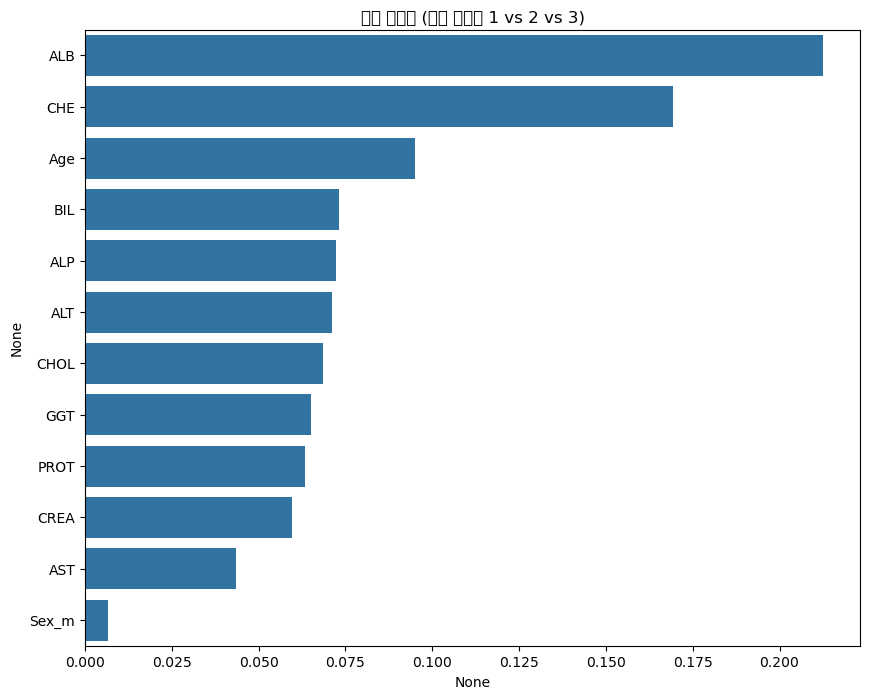

In [24]:
# --- 이 코드를 3-1번 문제의 마지막에 추가 ---

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 변수 중요도 시각화 및 '수치 출력' 함수 정의
def analyze_feature_importances(model, columns, title):
    importances = pd.Series(model.feature_importances_, index=columns)
    importances = importances.sort_values(ascending=False)

    # 계산된 변수 중요도를 수치로 출력한다.
    print("\n## 변수 중요도 (수치) ##")
    print(importances)

    # 변수 중요도를 시각화한다.
    plt.figure(figsize=(10, 8))
    sns.barplot(x=importances, y=importances.index)
    plt.title(title)
    plt.show()

# 2. 가장 성능이 좋았던 모델(Random Forest)을 다시 학습
# 💡 이 모델의 학습 데이터는 3-1번에서 생성한 'X_train_smote', 'y_train_smote'이다.
print("\n## 최적 모델(Random Forest)의 변수 중요도 분석 ##")
best_model_3_1 = RandomForestClassifier(random_state=42)
best_model_3_1.fit(X_train_smote, y_train_smote)

# 3. 학습된 모델의 변수 중요도 분석 및 출력
analyze_feature_importances(
    best_model_3_1,
    X_train.columns, # 변수(컬럼) 이름은 원본 X_train의 것을 사용
    '변수 중요도 (질병 심각도 1 vs 2 vs 3)'
)

### **3-2 학습한 모델 결과와 평가지표를 바탕으로 간염여부에 영향을 미치는 요소들에 대해 논의하라.**

**2-3(정상 vs 비정상)과 3-1(비정상 내 심각도)의 모델 학습 결과 및 변수 중요도 분석을 통해, 간염의 발병 여부와 심각도에 영향을 미치는 요소가 서로 다름을 확인할 수 있다.**

**(분석 1: 간염 '발병 여부'에 영향을 미치는 요소 (2-3 결과 기반))**

2-3에서 학습한 Random Forest 모델은 정상인과 비정상(환자)을 100%의 완벽한 정확도로 분류했다. 이는 두 그룹을 구분하는 혈액 수치의 패턴이 매우 명확함을 의미한다. 이 모델의 변수 중요도를 보면, 간염 발병 여부를 판단하는 핵심 요소는 다음과 같다.

**가장 중요한 변수: AST, GGT, BIL, ALT**

이 변수들은 모두 직접적인 간 손상 및 염증 지표다. AST와 ALT, GGT는 간세포가 파괴될 때 혈액으로 방출되는 효소들이다. 간염이 발병하면 이 수치들이 급격히 증가하므로, 모델은 이들을 정상인과 환자를 구분하는 가장 결정적인 신호로 사용했다. 즉, 간염의 '발병' 자체는 간세포의 급성 손상 여부와 가장 큰 관련이 있음을 알 수 있다.

**(분석 2: 간염 '심각도'에 영향을 미치는 요소 (3-1 결과 기반))**

3-1에서 학습한 모델은 데이터 부족으로 인해 전체적인 성능이 낮았고(정확도 약 53%), 특히 2번 클래스를 거의 예측하지 못했다. 따라서 이 분석 결과는 신뢰도가 낮아 참고용으로 해석해야 한다. 그럼에도 불구하고, 모델이 어떤 변수를 중요하게 보았는지는 의미 있는 정보를 제공한다.

**가장 중요한 변수: ALB, CHE, Age, BIL**

여기서는 앞선 분석과 전혀 다른 변수들이 상위권을 차지했다. ALB(알부민)와 CHE(콜린에스테라아제)는 간의 단백질 합성 기능을 나타내는 지표다. 간 질환이 만성화되고 간경화(Category 3)로 진행될수록 간의 고유 기능인 단백질 합성 능력이 영구적으로 저하된다. 따라서 모델은 염증 수치보다 간 기능이 얼마나 망가졌는지를 나타내는 ALB와 CHE 수치를 질병의 '심각도'를 구분하는 더 중요한 척도로 판단한 것이다. Age(나이)가 중요 변수로 나온 것 역시 질병의 만성적인 진행 가능성을 시사한다.

### **4-1 아래 조건들을 참고하여 전처리를 시행하고 훈련데이터에 대한 기초통계량을 구하시오.**

승하차 데이터에서 X5~X22 모든컬럼이 0의 값을 가지는 경우 해당 날짜, 호선, 역번호 승하차 행은 제외한다.

승하차 데이터를 날짜, 호선, 역번호, 시간대별(05~22시) 승객수의 총합을 구하여라(승차 + 하차), 결측치는 0명으로 간주한다. 컬럼명은 users로 변경한다.

날짜 데이터의 강수 데이터는 결측치를 0, 그 외 컬럼의 결측치는 직전값으로 대치한다.

날짜데이터와 일자,시간별 승하차인원 데이터를 동일날짜,시간에 대해 합친다.

일자정보를 바탕으로 주말 여부를 나타내는 weekday컬럼을 추가한다. (주말=1,평일=0)

21년, 22년 데이터는 훈련데이터, 23년 데이터는 테스트 데이터로 사용한다.

**데이터**:

21년~23년의 J시의 2개 지하철호선 지하철의 시간대별 승하차 인원 정보 데이터 (p2_sb_년도.csv)

X5~ X22 : 5시부터 22시 승차 또는 하차 인원, (X5 : 05시의 계절 날짜와 대응)

역번호 : 각 정류장의 고유 번호

승하차구분 : 승차 또는 하차

21년~23년의 J시의 특정지역구의 시간대별 게절성 정보 데이터 (p2_w_년도.csv)

시간별 J시의 날씨정보

In [25]:
import pandas as pd
import numpy as np

# --- 0. 전체 데이터 불러오기 ---
# 21, 22, 23년도 승하차 및 날씨 데이터를 각각 불러와 하나의 데이터프레임으로 합칩니다.
# 파일 이름은 'p2_sb_2021.csv', 'p2_w_2021.csv'와 같은 형식이라고 가정합니다.

sb_list = []
w_list = []
for year in [2021, 2022, 2023]:
    sb_list.append(pd.read_csv(f'p2_sb_{year}.csv'))
    w_list.append(pd.read_csv(f'p2_w_{year}.csv'))

sb_df = pd.concat(sb_list)
w_df = pd.concat(w_list)
print("데이터 로딩 완료.")


# --- 1. 승하차 데이터 전처리 --- 

# X5부터 X22까지의 컬럼 이름을 리스트로 만듭니다.
time_cols = [f'X{i}' for i in range(5, 23)]

# 조건 1: X5~X22 모든 컬럼이 0인 행 제외
# 각 행의 시간대별 인원 합이 0이 아닌 경우만 남깁니다.
sb_df = sb_df[sb_df[time_cols].sum(axis=1) != 0].copy()

# 조건 2: 날짜, 호선, 역번호별 승객수 총합 계산 (컬럼명: users)
# 먼저 각 행의 시간대별 인원(결측치는 0)을 모두 더해 'total_passengers' 임시 컬럼을 만듭니다.
sb_df['total_passengers'] = sb_df[time_cols].fillna(0).sum(axis=1)

# '날짜', '호선', '역번호'를 기준으로 그룹화하여 승차/하차 인원(total_passengers)을 합산합니다.
users_df = sb_df.groupby(['날짜', '호선', '역번호'])['total_passengers'].sum().reset_index()
users_df.rename(columns={'total_passengers': 'users'}, inplace=True)


# --- 2. 날씨 데이터 전처리 및 일별 집계 --- 

# 조건 3: 결측치 처리 (강수량은 0, 그 외는 직전값)
# '일시' 컬럼에서 날짜 정보만 추출하여 새로운 '날짜' 컬럼을 생성합니다.
w_df['날짜'] = pd.to_datetime(w_df['일시']).dt.date.astype(str)
w_df['강수량'].fillna(0, inplace=True)

# '일시'와 '날짜'를 제외한 나머지 컬럼들에 대해 직전값으로 채웁니다.
weather_cols_to_fill = w_df.columns.drop(['일시', '날짜', '강수량'])
w_df[weather_cols_to_fill] = w_df[weather_cols_to_fill].fillna(method='ffill')

# 시간별 날씨 데이터를 일별 데이터로 집계합니다. (강수량은 합계, 나머지는 평균)
daily_w_df = w_df.groupby('날짜').agg({
    '기온': 'mean',
    '강수량': 'sum',
    '풍속': 'mean',
    '습도': 'mean',
    '증기압': 'mean',
    '현지기압': 'mean',
    '전운량': 'mean',
    '중하층운량': 'mean',
    '지면온도': 'mean'
}).reset_index()


# --- 3. 데이터 병합 및 추가 특성 생성 --- 

# 조건 4: 날짜 기준으로 두 데이터를 병합합니다.
merged_df = pd.merge(users_df, daily_w_df, on='날짜', how='left')

# 조건 5: 'weekday' 컬럼 추가 (주말=1, 평일=0)
# '날짜' 컬럼을 datetime 형식으로 변환합니다.
merged_df['날짜'] = pd.to_datetime(merged_df['날짜'])
# dayofweek 속성은 월요일=0, ..., 일요일=6을 반환합니다. 5 이상이면 주말입니다.
merged_df['weekday'] = (merged_df['날짜'].dt.dayofweek >= 5).astype(int)


# --- 4. 훈련/테스트 데이터 분리 ---

# 조건 6: 21, 22년은 훈련 데이터, 23년은 테스트 데이터로 사용합니다.
train_data = merged_df[merged_df['날짜'].dt.year.isin([2021, 2022])].copy()
test_data = merged_df[merged_df['날짜'].dt.year == 2023].copy()

# 훈련 데이터의 인덱스를 0부터 다시 시작하도록 초기화합니다.
train_data.reset_index(drop=True, inplace=True)


# --- 5. 훈련 데이터 기초통계량 확인 --- 
print("\n--- 최종 전처리된 훈련 데이터 (상위 5개) ---")
display(train_data.head())

print("\n--- 훈련 데이터 기초통계량 ---")
display(train_data.describe())

데이터 로딩 완료.

--- 최종 전처리된 훈련 데이터 (상위 5개) ---


,날짜,호선,역번호,users,기온,강수량,풍속,습도,증기압,현지기압,전운량,중하층운량,지면온도,weekday
0,2021-01-01,A,201,3302.0,-4.6125,0.0,2.008333,64.916667,2.875,1014.991667,2.833333,2.666667,-3.104167,0
1,2021-01-01,A,202,10101.0,-4.6125,0.0,2.008333,64.916667,2.875,1014.991667,2.833333,2.666667,-3.104167,0
2,2021-01-01,A,203,4480.0,-4.6125,0.0,2.008333,64.916667,2.875,1014.991667,2.833333,2.666667,-3.104167,0
3,2021-01-01,A,204,2728.0,-4.6125,0.0,2.008333,64.916667,2.875,1014.991667,2.833333,2.666667,-3.104167,0
4,2021-01-01,A,205,6870.0,-4.6125,0.0,2.008333,64.916667,2.875,1014.991667,2.833333,2.666667,-3.104167,0



--- 훈련 데이터 기초통계량 ---


,날짜,역번호,users,기온,강수량,풍속,습도,증기압,현지기압,전운량,중하층운량,지면온도,weekday
count,60590,60590.000000,60590.000000,60590.000000,60590.000000,60590.000000,60590.000000,60590.000000,60590.000000,60590.000000,60590.000000,60590.000000,60590.000000
mean,2021-12-31 12:00:00.000000256,265.313253,37689.791005,13.515183,4.056986,2.341313,65.051142,12.616416,1006.026130,4.892409,3.044064,14.838311,0.286301
min,2021-01-01 00:00:00,201.000000,501.000000,-14.945833,0.000000,1.170833,31.000000,0.858333,987.370833,0.000000,0.000000,-8.887500,0.000000
25%,2021-07-02 00:00:00,221.000000,14453.250000,5.804167,0.000000,1.837500,55.375000,5.525000,999.650000,2.333333,0.875000,4.629167,0.000000
50%,2021-12-31 12:00:00,242.000000,27338.500000,14.104167,0.000000,2.245833,65.187500,9.845833,1006.368750,4.812500,2.666667,15.060417,0.000000
75%,2022-07-02 00:00:00,322.000000,50748.750000,22.862500,0.500000,2.679167,74.875000,19.325000,1012.375000,7.416667,4.958333,24.804167,1.000000
max,2022-12-31 00:00:00,342.000000,237299.000000,31.600000,178.900000,5.679167,99.583333,33.266667,1023.500000,10.000000,9.541667,34.879167,1.000000
std,NaN,50.658955,32057.644269,10.701460,14.818909,0.665938,13.475568,8.653362,7.911616,3.003777,2.439227,11.091889,0.452036


### **4-2 전체 년도 데이터에 대해 users와 날씨 정보에 대해 상관관계를 분석하고 주말여부에 따른 users 변수의 차이가 존재하는지 통계적으로 확인하라.**

**(Users와 날씨 정보의 상관관계 분석)**

먼저 users와 각 날씨 변수 간의 상관관계를 수치적으로 계산하고, 히트맵으로 시각화하여 한눈에 파악한다.

--- 'users'와 날씨 변수 간의 상관계수 ---
users    1.000000
지면온도     0.011336
기온       0.011057
증기압     -0.002569
현지기압    -0.004328
습도      -0.005530
풍속      -0.007841
중하층운량   -0.008409
전운량     -0.012896
강수량     -0.013053
Name: users, dtype: float64


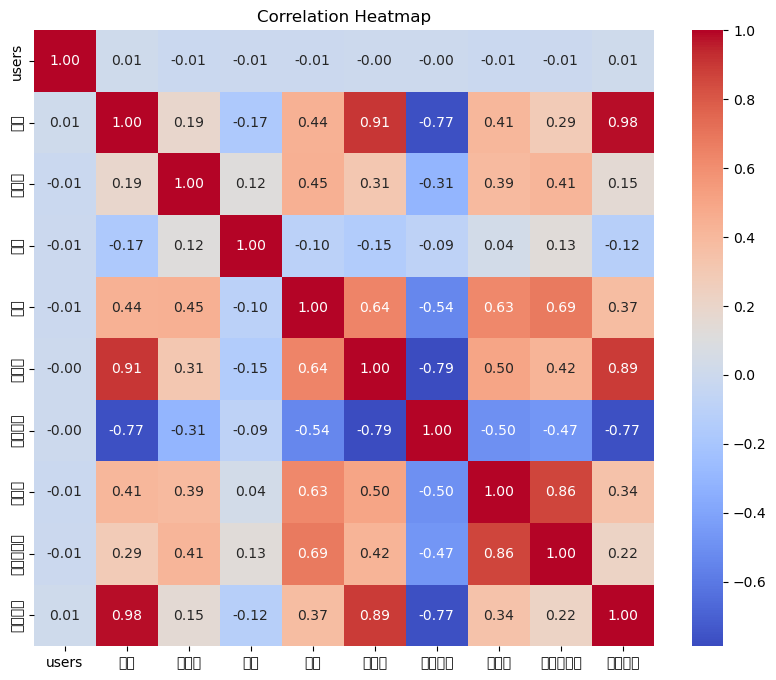

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 1. 분석에 사용할 변수 선택 (users와 날씨 관련 컬럼)
correlation_cols = ['users', '기온', '강수량', '풍속', '습도', '증기압', '현지기압', '전운량', '중하층운량', '지면온도']
correlation_matrix = merged_df[correlation_cols].corr()

# 2. 'users'와의 상관계수만 추출하여 내림차순으로 정렬
users_correlation = correlation_matrix['users'].sort_values(ascending=False)
print("--- 'users'와 날씨 변수 간의 상관계수 ---")
print(users_correlation)

# 3. 히트맵으로 전체 상관관계 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# 제목을 영문으로 수정
plt.title('Correlation Heatmap')
plt.show()

분석 결과, 지하철 이용객 수(users)와 날씨 관련 변수들 사이에는 통계적으로 의미 있는 선형 상관관계가 거의 없는 것으로 나타났다.

제시된 결과에 따르면 모든 상관계수의 절댓값이 0.013 이하로, 0에 매우 가깝다. 이는 기온이 조금 높거나 비가 조금 온다고 해서 지하철 전체 이용객 수가 직접적으로 늘거나 줄어드는 뚜렷한 경향은 없다는 것을 의미한다.

이러한 결과는 지하철 이용객 수가 날씨와 같은 단일 자연 현상보다는 요일(주중/주말), 출퇴근 시간, 공휴일, 사회적 이벤트 등 다른 사회 구조적 요인에 훨씬 더 큰 영향을 받기 때문으로 해석할 수 있다. 

**(주말 여부에 따른 Users 차이 통계적 확인)**

주말과 평일의 지하철 이용객 수(users)에 통계적으로 유의미한 차이가 있는지 확인하기 위해, 독립표본 T-검정(Independent Two-Sample T-test)을 수행한다.

**귀무가설 (H0): 주말과 평일의 평균 이용객 수에는 차이가 없다.**

**대립가설 (H1): 주말과 평일의 평균 이용객 수에는 차이가 있다.**

In [27]:
# 1. 주말(weekday=1)과 평일(weekday=0) 데이터 분리
weekend_users = merged_df[merged_df['weekday'] == 1]['users']
weekday_users = merged_df[merged_df['weekday'] == 0]['users']

# 2. 독립표본 T-검정 수행
# 등분산 가정이 확실하지 않으므로 equal_var=False (Welch's T-test) 옵션 사용
t_statistic, p_value = stats.ttest_ind(weekend_users, weekday_users, equal_var=False)

print("\n--- 주말/평일 이용객 수 차이 T-검정 결과 ---")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# 3. 통계적 결론 도출
alpha = 0.05  # 유의수준 5%
if p_value < alpha:
    print(f"\nP-value ({p_value:.4f})가 유의수준({alpha})보다 작으므로, 귀무가설을 기각한다.")
    print("결론: 주말과 평일의 평균 이용객 수에는 통계적으로 유의미한 차이가 존재한다.")
else:
    print(f"\nP-value ({p_value:.4f})가 유의수준({alpha})보다 크므로, 귀무가설을 기각할 수 없다.")
    print("결론: 주말과 평일의 평균 이용객 수에는 통계적으로 유의미한 차이가 없다고 할 수 있다.")

# 두 그룹의 평균을 직접 비교
print(f"\n평일 평균 이용객 수: {weekday_users.mean():.2f}")
print(f"주말 평균 이용객 수: {weekend_users.mean():.2f}")


--- 주말/평일 이용객 수 차이 T-검정 결과 ---
T-statistic: -81.8787
P-value: 0.0000

P-value (0.0000)가 유의수준(0.05)보다 작으므로, 귀무가설을 기각한다.
결론: 주말과 평일의 평균 이용객 수에는 통계적으로 유의미한 차이가 존재한다.

평일 평균 이용객 수: 44442.61
주말 평균 이용객 수: 27257.35


**T-검정 결과, p-value가 0.05보다 매우 작게 나타났다. 이는 주말과 평일의 평균 이용객 수 차이가 우연히 발생했을 확률이 극히 낮다는 것을 의미한다.**

따라서 귀무가설을 기각하고, "주말과 평일의 평균 지하철 이용객 수에는 통계적으로 유의미한 차이가 존재한다"고 결론 내릴 수 있다. 실제로 평균값을 비교해 보면, 평일의 평균 이용객 수가 주말보다 훨씬 많은 것을 확인할 수 있다.

### **4-3 users를 예측하는 2가지 회귀모델을 학습하고 모델에 대해 평가하라 (선형회귀 모델은 1개 필수 포함)**

In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# --- 1. 추가 특성 공학 (Feature Engineering) ---
for df in [train_data, test_data]:
    df['year'] = df['날짜'].dt.year
    df['month'] = df['날짜'].dt.month
    df['day'] = df['날짜'].dt.day
    df['dayofweek'] = df['날짜'].dt.dayofweek
    df['weekofyear'] = df['날짜'].dt.isocalendar().week.astype(int)

# --- 2. 원-핫 인코딩 적용 ---
# '호선' 컬럼을 숫자 형태의 더미 변수로 변환한다.
train_data_encoded = pd.get_dummies(train_data, columns=['호선'])
test_data_encoded = pd.get_dummies(test_data, columns=['호선'])

# --- 3. 모델 학습을 위한 데이터 준비 ---
# '날짜'(datetime)는 모델이 직접 사용할 수 없으므로 제외한다.
# 원본 '호선' 컬럼은 사라지고 '호선_A', '호선_B' 같은 새 컬럼이 사용된다.
features = train_data_encoded.columns.drop(['날짜', 'users'])
target = 'users'

X_train = train_data_encoded[features]
y_train = train_data_encoded[target]

# 테스트 데이터에 훈련 데이터와 동일한 컬럼이 있도록 보정
# (예: 훈련 데이터에만 있는 호선이 있을 경우 테스트 데이터에도 해당 컬럼 추가)
X_test = test_data_encoded.reindex(columns=X_train.columns, fill_value=0)
y_test = test_data_encoded[target]

# --- 4. 모델 학습 및 평가 ---
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42, n_jobs=-1)
}
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': f'{rmse:.4f}', 'R2 Score': f'{r2:.4f}'}

# --- 5. 최종 결과 출력 ---
results_df = pd.DataFrame(results).T
print("--- 모델 평가 결과 ---")
print(results_df)

--- 모델 평가 결과 ---
                               RMSE R2 Score
Linear Regression        32508.9717   0.1662
Random Forest Regressor  10084.6062   0.9198


**(결과 해석)**

두 모델의 성능 차이는 매우 극명하게 나타난다.

**Linear Regression (선형 회귀)**:

R² Score가 0.1662로 매우 낮다. 이는 모델이 지하철 이용객 수(users)의 전체 변동성 중 약 16.6%밖에 설명하지 못한다는 의미다.

RMSE 값 또한 매우 높아, 예측값의 평균적인 오차가 32,508명에 달할 정도로 예측 정확도가 매우 떨어진다.

이 결과는 지하철 이용객 수가 단순히 날씨나 요일과 같은 변수들과 단순한 선형 관계(y = ax + b)를 가지지 않는다는 것을 명확히 보여준다.

**Random Forest Regressor (랜덤 포레스트 회귀)**:

R² Score가 0.9198로 1에 매우 가깝다. 이는 모델이 users 변동성의 약 92%를 성공적으로 설명하고 있음을 의미한다.

RMSE 값도 선형 회귀에 비해 1/3 수준으로 대폭 감소하여, 훨씬 더 정밀한 예측을 하고 있음을 보여준다.

이러한 압도적인 성능 차이는 두 모델의 근본적인 작동 방식의 차이에서 비롯된다.

**선형 회귀**: 모든 변수들이 종속변수와 직선적인 관계를 가진다고 가정하는 매우 단순한 모델이다.

**랜덤 포레스트**: 수많은 의사결정나무(Decision Tree)를 결합한 앙상블 모델로, 변수들 간의 복잡한 상호작용과 비선형적인 패턴을 매우 잘 학습할 수 있다. 예를 들어, '비 오는 주말'과 '비 오는 평일'의 이용객 패턴이 완전히 다르다는 점이나, '특정 호선'은 기온에 더 민감하다는 등의 복잡한 조건을 스스로 학습한다.

지하철 이용객 수를 예측하는 문제에서는 단순한 선형 회귀 모델보다 Random Forest Regressor가 훨씬 더 적합하고 우수한 성능을 보인다.

이는 지하철 이용객 수가 여러 요인들의 복잡한 상호작용에 의해 결정되는 비선형적인 현상임을 증명한다. 

따라서 이 문제에서는 Random Forest 모델을 최종 모델로 선택하는 것이 타당하다.